<a href="https://colab.research.google.com/github/yeb2Binfang/DS_GY_3001_CV/blob/main/Lab/Class_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Name: Introduction to Computer Vision
# Authors: Aryaa Singh, Manjusha Mishra 
# Date: 02/11/21
# Class Exercise - IMAGE STITCHING!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import warp
import cv2

In [ ]:
# Download the two images: https://github.com/Hoya-kim/Image-warping-stitching/tree/master/images

In [ ]:
# Loading the two images

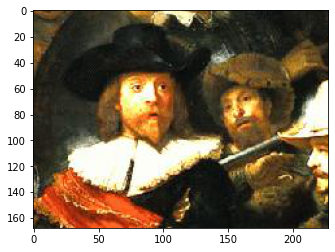

In [ ]:
f1 = plt.imread('nachtwacht1.jpg')/255
plt.imshow(f1); plt.show()

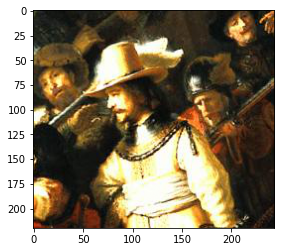

In [ ]:
f2 = plt.imread('nachtwacht2.jpg')/255
plt.imshow(f2); plt.show()

In [ ]:
f1.shape

(168, 228, 3)

In [ ]:
f2.shape

(220, 244, 3)

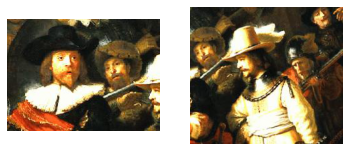

In [ ]:
plt.subplot(121); plt.imshow(f1); plt.axis('off');
plt.subplot(122); plt.imshow(f2); plt.axis('off');

In [ ]:
# points in the left image 
xy = np.array([[ 157, 32],
                [ 211, 37],
                [ 222,107],
                [ 147,124]])
 
# points in the right image
xaya = np.array([[  6, 38],
                 [ 56, 31],
                 [ 82, 87],
                 [ 22,118]])

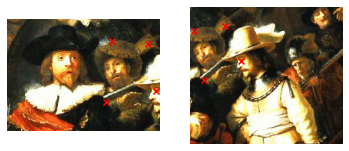

In [ ]:
plt.subplot(121); plt.imshow(f1); plt.axis('off');
plt.scatter(xy[:,0], xy[:,1], marker='x', color = 'red');
plt.subplot(122); plt.imshow(f2); plt.axis('off');
plt.scatter(xaya[:,0], xaya[:,1], marker='x', color = 'red');
plt.show()

In [ ]:
# From these point correspondences we can calculate the projective transform P 
# that maps coordinates in the right image (in the xaya array) onto coordinates in the left image (in the array xy).

In [ ]:
# OPEN CV provides the below function to calculate the projection MATRIX!
P = cv2.getPerspectiveTransform(xy.astype(np.float32), xaya.astype(np.float32))
P
# Though you are not allowed to use this function !!!

array([[ 1.01685498e+00,  3.12932553e-01, -1.63082057e+02],
       [-2.17037452e-01,  9.92701412e-01,  4.39692054e+01],
       [ 4.93917724e-04,  5.87218302e-04,  1.00000000e+00]])

In [ ]:
# TASK: WRITE A FUNCTION to perform perspective Transformation!!

In [ ]:
# cv2.getPerspectiveTransform() (Description from OpenCV)

# Calculates the 3x3 matrix to transform the four source points to the four destination points

# Calculates coefficients of perspective transformation
#  which maps source (xi,yi) to destination (ui,vi), (i=1,2,3,4):
# 
#       c00*xi + c01*yi + c02
#  ui = ---------------------
#       c20*xi + c21*yi + c22
# 
#       c10*xi + c11*yi + c12
#  vi = ---------------------
#       c20*xi + c21*yi + c22
# 
#  Coefficients are calculated by solving linear system:
#              a                         x    b
#  / x0 y0  1  0  0  0 -x0*u0 -y0*u0 \ /c00\ /u0\
#  | x1 y1  1  0  0  0 -x1*u1 -y1*u1 | |c01| |u1|
#  | x2 y2  1  0  0  0 -x2*u2 -y2*u2 | |c02| |u2|
#  | x3 y3  1  0  0  0 -x3*u3 -y3*u3 |.|c10|=|u3|,
#  |  0  0  0 x0 y0  1 -x0*v0 -y0*v0 | |c11| |v0|
#  |  0  0  0 x1 y1  1 -x1*v1 -y1*v1 | |c12| |v1|
#  |  0  0  0 x2 y2  1 -x2*v2 -y2*v2 | |c20| |v2|
#  \  0  0  0 x3 y3  1 -x3*v3 -y3*v3 / \c21/ \v3/
# 
#  where:
#    cij - matrix coefficients, c22 = 1

In [ ]:
xy = xy.astype(np.float32)
xaya = xaya.astype(np.float32)

In [ ]:
# P = cv2.getPerspectiveTransform(xy.astype(np.float32), xaya.astype(np.float32))
# P

In [ ]:
def getPerspectiveTransform(src_pts, dest_pts):
    #  Checking points dimension
    if src_pts.shape != (4,2) or dest_pts.shape != (4,2):
        raise ValueError("Four points expected for both source and destination")

    a, b = np.zeros((8, 8)), np.zeros((8))
    
    for i in range(4):
        a[i][0] = a[i+4][3] = src_pts[i][0]
        a[i][1] = a[i+4][4] = src_pts[i][1]
        a[i][2] = a[i+4][5] = 1
        a[i][3] = a[i][4] = a[i][5] = 0
        a[i+4][0] = a[i+4][1] = a[i+4][2] = 0
        a[i][6] = -src_pts[i][0]*dest_pts[i][0]
        a[i][7] = -src_pts[i][1]*dest_pts[i][0]
        a[i+4][6] = -src_pts[i][0]*dest_pts[i][1]
        a[i+4][7] = -src_pts[i][1]*dest_pts[i][1]
        b[i] = dest_pts[i][0]
        b[i+4] = dest_pts[i][1]

    x = np.linalg.solve(a, b)
    x.resize((9,), refcheck=False)
    x[8] = 1 # Seting c22 to 1 
    return x.reshape((3,3))

In [ ]:
perspectiveMatrix = getPerspectiveTransform(xy, xaya)
perspectiveMatrix

array([[ 1.01685498e+00,  3.12932553e-01, -1.63082057e+02],
       [-2.17037452e-01,  9.92701412e-01,  4.39692054e+01],
       [ 4.93917724e-04,  5.87218302e-04,  1.00000000e+00]])

In [ ]:
f_stitched = warp(f2, perspectiveMatrix, output_shape=(300,450))

In [ ]:
M, N = f1.shape[:2]

In [ ]:
f_stitched[0:M, 0:N, :] = f1

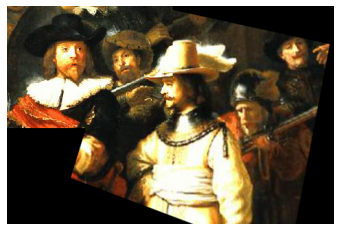

In [ ]:
plt.imshow(f_stitched); plt.axis('off')
plt.show()

In [ ]:
# THANK YOU !!